### Decision Trees
* Supervised Learning
* Classification Tree - when data is categorical
* Regression Tree - when data is continous 

* Known as CART -> Classification and Reression Tree

<img src="https://camo.githubusercontent.com/af10e8839a0aabf4b37d41448cd5cdbc32aaed58/68747470733a2f2f6769746875622e636f6d2f6177616e74696b2f507974686f6e44617461536369656e636548616e64626f6f6b2f7261772f663263346138616633663665376535663435353436393833396533316230396162366332323836382f6e6f7465626f6f6b732f666967757265732f30352e30382d6465636973696f6e2d747265652e706e67"/>

* Decision trees are extremely intuitive ways to classify or label objects: you simply ask a series of questions designed to zero-in on the classification.
* Decision TRee generates model, which is like questions & help getting data classified
* Non-parametric model, takes

In [2]:

#Only for generating data
from sklearn.datasets import make_blobs

In [4]:

x,y = make_blobs(n_samples=300, centers=4, n_features=2,random_state=0, cluster_std=1.0)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

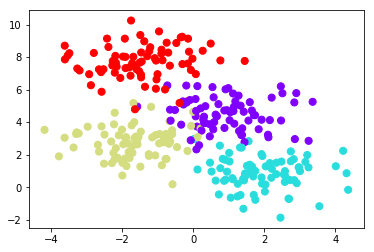

In [8]:
plt.scatter(x[:,0], x[:,1], c=y, s=50,cmap='rainbow')

In [11]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(x,y)

In [13]:
x_test,y_test = make_blobs(n_samples=30000, centers=4, n_features=2,random_state=0, cluster_std=2.0)

In [15]:
y_pred = tree.predict(x_test)

In [17]:
y_pred

array([3, 0, 0, ..., 3, 3, 1])

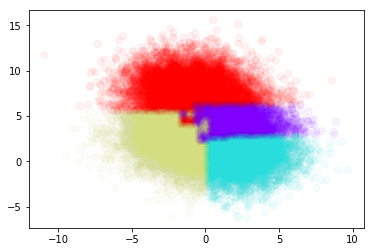

In [19]:
plt.scatter(x_test[:,0], x_test[:,1], c=y_pred, s=50,cmap='rainbow', alpha=0.05)

In [21]:
tree.predict([[10.0,0]])

array([1])

In [23]:
y

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0, 2, 2,
       3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2, 3, 1, 3,
       2, 0, 2, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0, 3, 3, 0, 1,
       3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0, 2, 2, 1, 3, 1,
       0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2, 2, 1, 3, 2, 2, 3,
       0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 3, 0, 1, 2, 3, 2, 1, 0, 3,
       0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3, 1, 1, 0, 2, 1, 0, 2, 2,
       0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0, 2, 3, 0, 2, 1, 2, 0, 3, 2,
       3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0, 3, 1, 1, 2, 1, 2, 0, 3, 3, 0,
       0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0, 1, 3, 3, 3, 3, 2, 2, 3, 0, 2, 1,
       0, 2, 2, 2, 1, 1, 3, 0, 0, 2, 1, 3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1,
       1, 0, 3, 3, 1, 1, 0, 1, 1, 1, 3, 2, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3,
       2])

### Random Forests
* Group of decision trees
* Used for classification and regression problems
* Increased performance and accuracy 
* Minimized varaince and bias

* multiple overfitting estimators (decison trees) can be combined to reduce the effect of this overfitting—is what underlies an ensemble method called bagging.
* Bagging makes use of an ensemble (a grab bag, perhaps) of parallel estimators, each of which over-fits the data, and averages the results to find a better classification.
* An ensemble of randomized decision trees is known as a random forest.

In [25]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [31]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [33]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

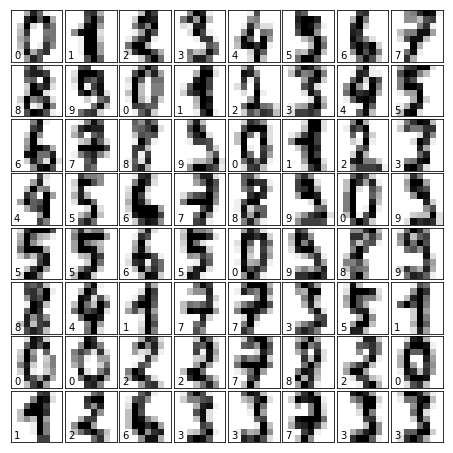

In [35]:

# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [39]:
digits.data[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [41]:
digits.data[0].reshape((8,8))

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [49]:
#Split data into train & test sets
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)

In [50]:
Xtrain.shape

(1347, 64)

In [52]:
Xtest.shape

(450, 64)

In [54]:

from sklearn.ensemble import RandomForestClassifier
#n_estimators - Num of decison trees
model = RandomForestClassifier(n_estimators=1000)

In [56]:
model.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [58]:
ypred = model.predict(Xtest)

In [60]:
from sklearn import metrics

In [62]:
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       1.00      0.98      0.99        44
          2       0.95      1.00      0.98        42
          3       0.98      0.98      0.98        45
          4       0.97      1.00      0.99        37
          5       0.98      0.98      0.98        48
          6       1.00      1.00      1.00        52
          7       1.00      0.96      0.98        50
          8       0.96      0.98      0.97        47
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



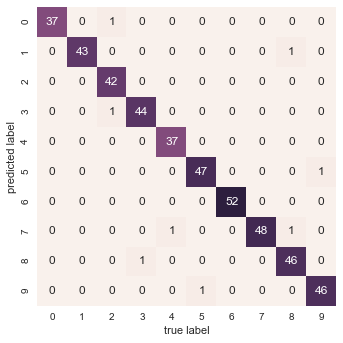

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [70]:
model.predict(Xtest[0])

C:\Users\omc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([2])

In [72]:
Xtest[0].reshape((8,8))

array([[  0.,   0.,  11.,  16.,  15.,   3.,   0.,   0.],
       [  0.,   5.,  16.,  12.,  11.,  13.,   0.,   0.],
       [  0.,   3.,  13.,   1.,   5.,  15.,   0.,   0.],
       [  0.,   0.,   0.,   0.,  12.,  11.,   0.,   0.],
       [  0.,   0.,   0.,   1.,  16.,   7.,   0.,   0.],
       [  0.,   0.,   0.,  10.,  15.,   0.,   0.,   0.],
       [  0.,   0.,  12.,  16.,  16.,  11.,   1.,   0.],
       [  0.,   0.,  13.,  13.,   8.,  13.,  16.,   8.]])

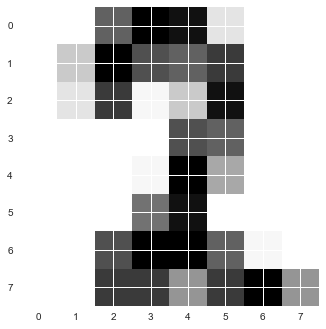

In [74]:
plt.imshow(Xtest[0].reshape((8,8)))

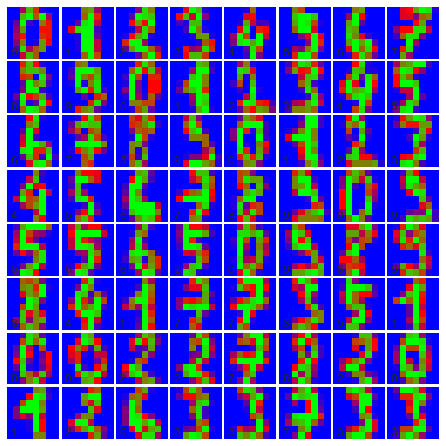

In [76]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.brg, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))


#####  Summary of Random Forests
* Based on concept of ensamble estimators
* Both training & prediction are fast because they can be parallelized
* non-parametric can be extremely flexible